In [1]:
import os
import geopandas as gpd
import pandas as pd

In [2]:
inpath = r'\\clsrv111\transpor\MPO\TIP\TIP FY21-24\MAPS\Data'

In [3]:
mtip_points = gpd.read_file(os.path.join(inpath, 'Points_201014.shp'))

In [4]:
mtip_points.head()

,MTIP_ID,Applicant,Proj_Name,Fiscal_Yrs,Fed_Fund,Fed_Source,Other_Fund,OF_Source,Proj_Desc,Mode,geometry
0,11,Eugene,Ferry Street Bridge seismic retrofit,2021 - 2022,605000.00,STBG Z230,0.0,None,Design for seismic strengthening of Ferry Stre...,transit,POINT (-13701698.700 5474284.900)
1,14,Eugene,W 11th and Chambers St seismic bridge retrofits,2021 - 2022,1795000.00,STBG Z230,0.0,None,Complete design for seismic strengthening of b...,transit,POINT (-13709997.200 5472873.300)
2,14,Eugene,W 11th and Chambers St seismic bridge retrofits,2021 - 2022,1795000.00,STBG Z230,0.0,None,Complete design for seismic strengthening of b...,transit,POINT (-13705282.100 5475085.300)
3,25,Oregon DOT,NW Oregon (Southern Portion) Signal Improvements,2019 - 2021,3918919.86,"STBGF Z240, ACP0 (HSIP), HSIP ZS30",0.0,None,Add signal enhancements at several intersectio...,transit,POINT (-13685618.200 5474112.400)
4,30,Oregon DOT,Bailey Hill Rd. @ Bertelsen Rd. (Eugene),"2021 - 2022, 2024",680214.72,HSIP ZS30,0.0,None,Construct a roundabout with enhanced bicycle a...,"bike, pedestrian",POINT (-13710887.700 5470085.900)


In [58]:
path = r'C:\Users\clid1852\OneDrive - lanecouncilofgovernments\MTIP'

In [59]:
mode = pd.read_csv(os.path.join(path,'trans_mode.csv'))

In [60]:
mode.head()

,MTIP_ID,Pedestrian_Mode,Bike_Mode,Trail_Mode,Transit_Mode
0,6,1.0,1.0,1.0,NaN
1,7,1.0,NaN,NaN,NaN
2,8,1.0,1.0,NaN,NaN
3,10,NaN,1.0,NaN,NaN
4,11,1.0,1.0,NaN,NaN


In [12]:
mtip_points = mtip_points.merge(mode, on='MTIP_ID', how='left')

In [63]:
fields = list(mode.columns)

In [64]:
fields.pop(0)

'MTIP_ID'

In [65]:
fields.append('Mode')

In [66]:
fields

['Pedestrian_Mode', 'Bike_Mode', 'Trail_Mode', 'Transit_Mode', 'Mode']

In [53]:
mtip_pts_ped = mtip_points[mtip_points['Pedestrian_Mode'] == 1].drop(columns = fields)
mtip_pts_bike = mtip_points[mtip_points['Bike_Mode'] == 1].drop(columns = fields)
mtip_pts_transit = mtip_points[mtip_points['Transit_Mode'] == 1].drop(columns = fields)

In [54]:
mtip_pts_ped.to_file(os.path.join(inpath, "mtip_pts_pedestrian.shp"))
mtip_pts_bike.to_file(os.path.join(inpath, "mtip_pts_bike.shp"))
mtip_pts_transit.to_file(os.path.join(inpath, "mtip_pts_transit.shp"))

In [7]:
mtip_lines = gpd.read_file(os.path.join(inpath, 'Lines_201014.shp'))

In [8]:
mtip_lines.head()

,MTIP_ID,Applicant,Proj_Name,Fiscal_Yrs,Fed_Fund,Fed_Source,Other_Fund,OF_Source,Proj_Desc,Shape_Leng,geometry
0,28,Oregon DOT,I-105: Willamette R - Pacific Hwy.,2023,5377071.54,NHPP Z001,0.0,None,Pavement resurfacing to repair rutting and wea...,6725.069581,"LINESTRING (-13703389.700 5475458.200, -137033..."
1,29,Oregon DOT,Chambers St.: 2nd Ave. - 28th Ave. (Eugene),"2021, 2024",504443.40,HSIP ZS30,0.0,None,Various improvements to include upgraded and i...,4748.477987,"LINESTRING (-13705364.400 5474345.600, -137053..."
2,34,Oregon DOT,Martin Luther King Jr. Blvd: Centennial Lp. - ...,"2021 - 2022, 2024",552674.46,HSIP ZS30,0.0,None,Reconfigure roadway to include; bus and turn l...,3352.961768,"LINESTRING (-13701225.400 5474663.100, -137010..."
3,35,Oregon DOT,OR528: Jurisdictional Transfer,2023,0.00,None,12000000.0,S070,State receives OR528 from the City of Springfi...,2346.489301,"LINESTRING (-13694751.300 5472513.900, -136947..."
4,36,Oregon DOT,OR126: Westbound Springfield (Willamette River...,2021,407015.28,NHPP Z001,0.0,None,Design for future construction project to dete...,401.224482,"LINESTRING (-13695599.200 5472366.100, -136955..."


In [9]:
list(mtip_lines)

['MTIP_ID',
 'Applicant',
 'Proj_Name',
 'Fiscal_Yrs',
 'Fed_Fund',
 'Fed_Source',
 'Other_Fund',
 'OF_Source',
 'Proj_Desc',
 'Shape_Leng',
 'geometry']

In [10]:
mtip_lines.MTIP_ID.unique()

array([28, 29, 34, 35, 36, 12, 25,  7, 13, 23, 10, 41, 27, 39,  6,  8, 15,
       16, 17, 42, 46, 32, 58, 59, 61, 62, 63, 64, 67, 70, 73],
      dtype=int64)

In [12]:
len(mtip_lines.MTIP_ID)

31

In [13]:
list(mtip_lines.MTIP_ID)

[28,
 29,
 34,
 35,
 36,
 12,
 25,
 7,
 13,
 23,
 10,
 41,
 27,
 39,
 6,
 8,
 15,
 16,
 17,
 42,
 46,
 32,
 58,
 59,
 61,
 62,
 63,
 64,
 67,
 70,
 73]

In [14]:
import numpy as np

In [15]:
m = np.array(['transit', 'bike', 'transit', 'pedestrian', 'transit', 'transit, pedestrian',
    'bike, pedestrian', 'transit', 'bike', 'transit, bike and pedestrian'])
# 5, 1, 2, 1, 15, 2, 1, 2, 1, 1

In [18]:
mtip_lines['Mode'] = np.repeat(m, [5, 1, 2, 1, 15, 2, 1, 2, 1, 1], axis=0)

In [19]:
mtip_lines.to_file(os.path.join(inpath, "Lines_210121.shp"))

In [56]:
mtip_lines = gpd.read_file(os.path.join(inpath, 'Lines_210121_Clip.shp'))

In [61]:
mtip_lines = mtip_lines.merge(mode, on='MTIP_ID', how='left')

In [67]:
mtip_lines_ped = mtip_lines[mtip_lines['Pedestrian_Mode'] == 1].drop(columns = fields)
mtip_lines_bike = mtip_lines[mtip_lines['Bike_Mode'] == 1].drop(columns = fields)
mtip_lines_trail = mtip_lines[mtip_lines['Bike_Mode'] == 1].drop(columns = fields)
mtip_lines_transit = mtip_lines[mtip_lines['Transit_Mode'] == 1].drop(columns = fields)

In [68]:
mtip_lines_ped.to_file(os.path.join(inpath, "mtip_lines_pedestrian.shp"))
mtip_lines_bike.to_file(os.path.join(inpath, "mtip_lines_bike.shp"))
mtip_lines_trail.to_file(os.path.join(inpath, "mtip_lines_trail.shp"))
mtip_lines_transit.to_file(os.path.join(inpath, "mtip_lines_transit.shp"))

In [69]:
mtip_pts_ped = gpd.read_file(os.path.join(inpath, 'mtip_pts_pedestrian.shp'))
mtip_pts_bike = gpd.read_file(os.path.join(inpath, 'mtip_pts_bike.shp'))
mtip_pts_transit = gpd.read_file(os.path.join(inpath, 'mtip_pts_transit.shp'))

In [86]:
mtip_lines_ped = gpd.read_file(os.path.join(inpath, "mtip_lines_pedestrian.shp"))

In [87]:
mtip_lines_ped.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [72]:
mtip_lines_bike = gpd.read_file(os.path.join(inpath, "mtip_lines_bike.shp"))
mtip_lines_trail = gpd.read_file(os.path.join(inpath, "mtip_lines_trail.shp"))
mtip_lines_transit = gpd.read_file(os.path.join(inpath, "mtip_lines_transit.shp"))

In [5]:
import matplotlib.pyplot as plt
import contextily as ctx

In [92]:
MPObd = gpd.read_file("V:/Data/Transportation/MPO_Bound.shp")

In [93]:
MPObd.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [89]:
#MPObd.crs = "EPSG:3857"

In [74]:
mtip_lines_ped.head()

,MTIP_ID,Applicant,Proj_Name,Fiscal_Yrs,Fed_Fund,Fed_Source,Other_Fund,OF_Source,Proj_Desc,Shape_Leng,geometry
0,29,Oregon DOT,Chambers St.: 2nd Ave. - 28th Ave. (Eugene),"2021, 2024",504443.40,HSIP ZS30,0.0,None,Various improvements to include upgraded and i...,4748.477987,"LINESTRING (-13705364.400 5474345.600, -137053..."
1,34,Oregon DOT,Martin Luther King Jr. Blvd: Centennial Lp. - ...,"2021 - 2022, 2024",552674.46,HSIP ZS30,0.0,None,Reconfigure roadway to include; bus and turn l...,3352.961768,"LINESTRING (-13701225.400 5474663.100, -137010..."
2,12,Eugene,8th Avenue streetscape and bikeway,2019 - 2021,2859000.00,"STBG Z230, CMAQ M40E, CMAQ Z400, ACPO",225995.0,Eugene,"Reconstruct roadway, move curbs, widen sidewal...",1502.844628,"LINESTRING (-13703468.100 5473323.200, -137032..."
3,25,Oregon DOT,NW Oregon (Southern Portion) Signal Improvements,2019 - 2021,3918919.86,"STBGF Z240, ACP0 (HSIP), HSIP ZS30",0.0,None,Add signal enhancements at several intersectio...,20985.082844,"MULTILINESTRING ((-13695048.600 5472519.700, -..."
4,7,Coburg,W Van Duyn Street (Coburg),2020 - 2021,40000.00,TA Z301,0.0,None,Construct sidewalk on south side of W Van Duyn...,322.304707,"LINESTRING (-13700338.900 5487323.700, -137002..."


In [91]:
MPObd.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

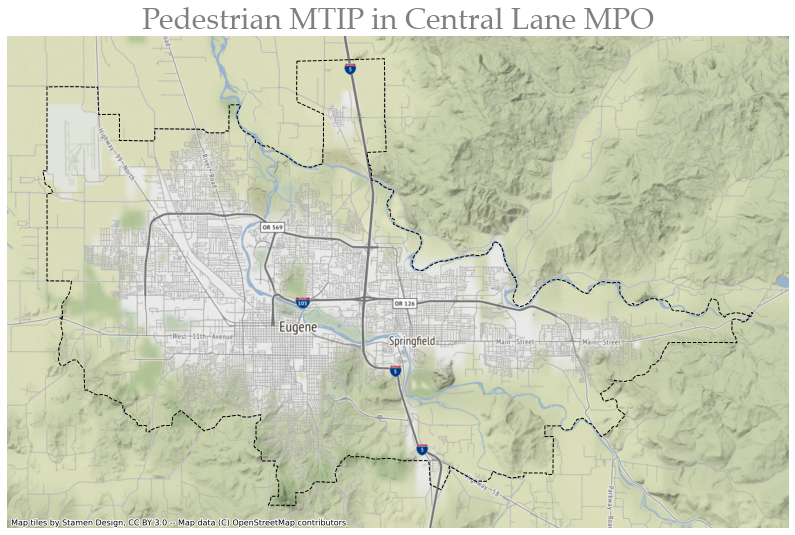

In [94]:
fig, ax = plt.subplots(figsize=(14, 12))
MPObd.plot(ax=ax, facecolor="none", edgecolor="black", linestyle='--', aspect=1)
#mtip_lines_ped.plot(ax=ax, color='red', legend=True, aspect=1)
ctx.add_basemap(ax)
plt.title("Pedestrian MTIP in Central Lane MPO", fontsize=30, fontname="Palatino Linotype", 
          color="grey")
ax.axis("off");